In [2]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 实现新的add函数，接收任意多个向量作为参数

In [8]:
# 计算向量的长度
def length(v):
    import math
    return math.sqrt(v[0] ** 2 + v[1] ** 2)

In [3]:
def add(*vectors):
    return (sum([v[0] for v in vectors]),sum([v[1] for v in vectors]))

## 实现translate(translation,vectors)，接收一个平移向量和一个向量列表


In [9]:
def translate(translation,vectors):
    return [add(translation,v) for v in vectors]

t_v=(1,1)
vectors=[(0,0),(0,1),(-3,-3)]
print(translate(t_v,vectors))

[(1, 1), (1, 2), (-2, -2)]


## 向量之和v+w和w+v结果相同，为什么？
## 向量之和，就是对应的坐标相加，对于算术的加法来说，交换
## 顺序并不会影响结果

## 如图2-28所示的三个箭头向量(标为u、v和w)中，哪一对的和的箭头最长？
## 哪一对的和对应的箭头最短？

# 可以通过首尾加法测量每一对向量和。

## 实现一个处理向量加法的Python函数，显示100个
## 相互不重叠的恐龙图像。这体现计算机图形学的威力
## 想象一下，手绘2100个坐标对是一件多么乏味的事情！

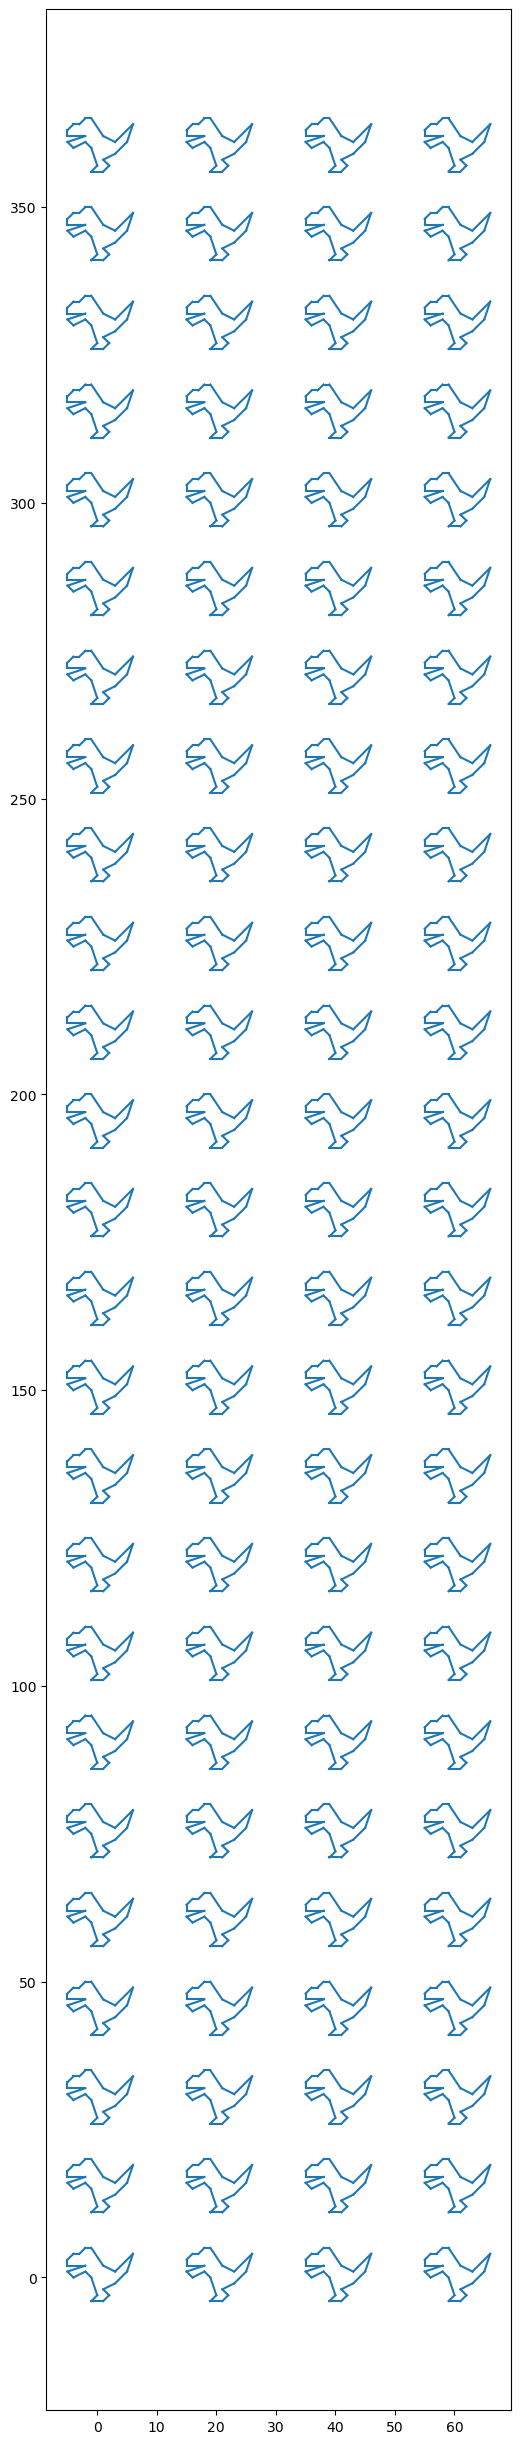

In [13]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)]

def add_c(bias, vectors):
    return [(v[0]+bias[0],v[1]+bias[1]) for v in vectors]
    

def draw_hundred_dinoes(base_dino_vectors):
    hundred_dinoes=[]
    for i in range(0,4):
        for j in range(0,25):
            bais=(i*20,j*15)
            one_dino_vector=add_c(bais,base_dino_vectors)
            hundred_dinoes.append(Polygon(*one_dino_vector,color=blue))
    draw(*hundred_dinoes,grid=None,axes=None,origin=None)
draw_hundred_dinoes(dino_vectors)            

## 练习2.12 对于(3,-2) + (1,1) + (-2,-2),是x分量还是y分量更长
### (3,-2) +(1,1) +(-2,-2)=(2,-3)。显然是y分量更长

## 练习2.14 假设有一个长为6的向量v和它的x分量(1,0)。
##  v的坐标是什么？
### v的x分量是(1,0) ，长度为6，那y分量的长度是sqrt(6^2-1^2)~=5.916
### v的坐标可能是(1,5.916)或者(1,-5.916)

### dino_vectors列表中哪个向量的长度最长？用我们实现的length函数快速计算出答案

In [17]:
def length_c(dino):
    import math
    return [math.sqrt(v[0]**2+v[1]**2) for v in dino]
print(max(length_c(dino_vectors)))

7.211102550927978


## 假设向量w的坐标是(sqrt(2),sqrt(3))。那么pi*w的坐标近似值是多少？画出原向量和新向量

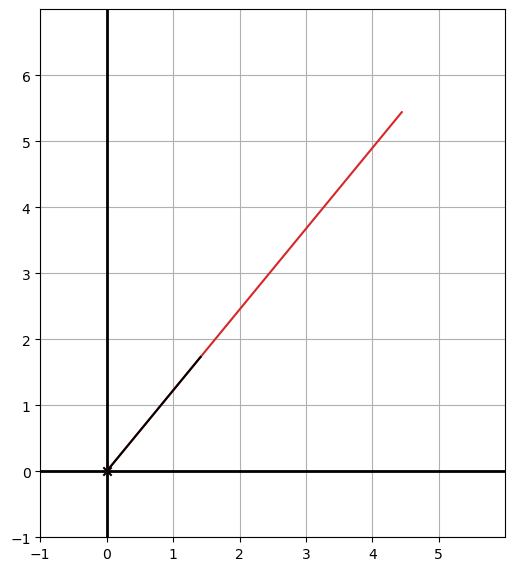

In [23]:
import math
w=(math.sqrt(2),math.sqrt(3))
new_w=(math.pi*w[0],math.pi*w[1])
arrow=[Segment((0,0),new_w,color=red), Segment((0,0),w,color=black)]
draw(*arrow)

## 练习写一个python函数scale(s,v)，将输入向量v和输入标量s相乘


In [4]:
def scale(scalar,v):
    return (scalar * v[0], scalar * v[1])

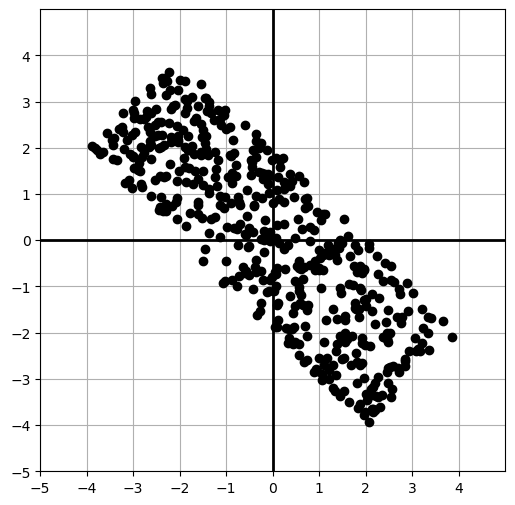

In [5]:
from random import uniform
u = (-1,1)
v = (1,1)
def random_r():
    return uniform(-3,3)
def random_s():
    return uniform(-1,1)

possibilities = [add(scale(random_r(), u), scale(random_s(),v)) for i in range(0,500)]

draw(Points(*possibilities))

## 2.24 实现Python函数subtract(v1,v2)，返回v1 - v2的结果。该函数接收两个二维向量作为输入，返回一个二维向量作为输出

In [10]:
def subtract(v1, v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

##  2.25实现Python函数distance(v1,v2)，返回两个输入向量之间的距离。

   实现另外一个Python函数perimeter(vectors),它接收一个向量列表作为参数，并返回每个向量到下一个向量的距离之和（包含末位向量与首尾向量之间的距离），以此来获取向量集合dino_vectors所定义的恐龙的周长

In [6]:
def distance(v1,v2):
    return length(subtract(v1,v2))
def perimeter(vectors):
    distances = [distance(vectors[i],vectors[(i+1) % len(vectors)]) for i in range(0,len(vectors))]
    return sum(distances)

In [11]:
perimeter([(1,0),(1,1),(0,1),(0,0)])

4.0

In [14]:
#  计算恐龙的周长
perimeter(dino_vectors)

44.77115093694563

## 2.26 u为向量(1,-1)。假定有另外一个正整数坐标(n,m) (n > m)的向量v,且它与u的距离为 13,那么从u到v的位移是多少？

通过穷举的方式搜索向量v

In [15]:
for n in range(-12,15):
    for m in range(-14,13):
        if distance((n,m),(1,-1)) == 13 and n > m > 0:
            print((n,m))

(13, 4)
